# Time series prediction using LSTM

## Dataset
- Daily minimum temperatures in Melbourne, Australia, 1981-1990
- Units: Degrees Celcius

## Question 1

### Load the data
- load daily-minimum-temperatures-in-me.csv

In [ ]:
import pandas as pd

In [ ]:
temp_df = pd.read_csv("daily-minimum-temperatures-in-me.csv")

### Print the data
- First 5 rows only

In [ ]:
temp_df.head()

,Date,Temperature
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


### Set index column
- Set the DataFrame index using "Date" column

In [ ]:
temp_df = temp_df.set_index("Date")

In [ ]:
temp_df.head()

,Temperature
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


## Question 2

### Check the total count of null values in the data

In [ ]:
temp_df.isna().sum()

Temperature    0
dtype: int64

### Drop all the rows with null values
- use dropna() method

In [ ]:
# There are no null values

## Question 3

### Describe your dataframe
- use describe() method

In [ ]:
temp_df.describe()

,Temperature
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


### Plot the dataframe
- use plot() method

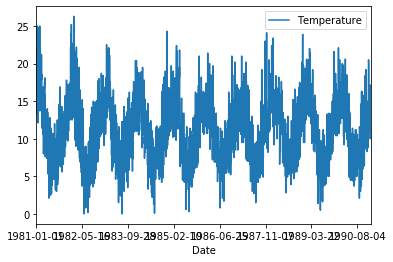

In [ ]:
temp_df.plot()

### Get representation of the distribution of data using histogram
- use hist() method

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EA95F7A8D0>]],
      dtype=object)

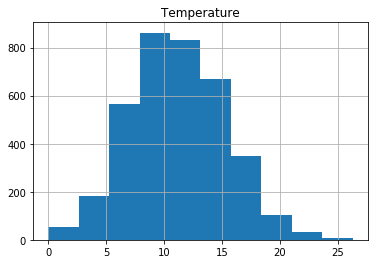

In [ ]:
temp_df.hist()

### Check minimum and maximum temperature
- use min() and max() methods

In [ ]:
print("min temperature :",temp_df.min())

min temperature : Temperature    0.0
dtype: float64


In [ ]:
print("min temperature :",temp_df.max())

min temperature : Temperature    26.3
dtype: float64


## Question 4

### Split the dataset into training and testing
- training data: 75%
- testing data: 25%

In [ ]:
#75% examples will used for training (in the begining)
train_size = int(len(temp_df) * 0.75)
print(train_size)
#30% will be used for Test
test_size = len(temp_df) - train_size
print(test_size)
#Split the data
train = temp_df[0:train_size]
test = temp_df[train_size: len(temp_df)]
print('train: {}\ntest: {}'.format(len(train), len(test)))

2737
913
train: 2737
test: 913


### Normalize the data
- normalize temperature values using MinMaxScaler
- feature_range: 0-1
- fit MinMaxScaler on train data and transform it
  - use fit_transform() method
- transform test data using MinMaxScaler object
  - use transform() method

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_df_train = scaler.fit_transform(train)
scaled_df_test = scaler.transform(test)

### Print scaled train and test data
- print only first 5 values

In [ ]:
scaled_df_train[0:5]

array([[0.78707224],
       [0.68060837],
       [0.7148289 ],
       [0.55513308],
       [0.60076046]])

In [ ]:
scaled_df_test[0:5]

array([[0.22813688],
       [0.22053232],
       [0.18631179],
       [0.19011407],
       [0.31939163]])

## Question 5

### Create sequential data
Map the temperature at a particular day 'd' to the temperature at day t
'd+n', where n is any number you define.

For example: to map temperatures of consecutive days, use d+1, i.e. lookback = 1
- Below function takes data as input and returns sequential data.
- X as features and y as labels

In [ ]:
import numpy as np
def create_seq_data(data, lookback=1):
  X, y = list(), list()
  
  for day in range((len(data)-lookback)):
    X.append(data[day: day+lookback, 0])
    y.append(data[day+lookback, 0])
  return np.array(X), np.array(y)

### Use the above function to create train and test sets
- Get X_train and y_train
- Get X_test and y_test
- lookback = 1

In [ ]:
X_train, y_train = create_seq_data(scaled_df_train)

In [ ]:
X_train

array([[0.78707224],
       [0.68060837],
       [0.7148289 ],
       ...,
       [0.38022814],
       [0.25475285],
       [0.35741445]])

In [ ]:
X_test, y_test = create_seq_data(scaled_df_test)

In [ ]:
X_test

array([[0.22813688],
       [0.22053232],
       [0.18631179],
       [0.19011407],
       [0.31939163],
       [0.46768061],
       [0.49429658],
       [0.43346008],
       [0.25855513],
       [0.28897338],
       [0.47148289],
       [0.26996198],
       [0.2851711 ],
       [0.38022814],
       [0.20152091],
       [0.23954373],
       [0.30418251],
       [0.31558935],
       [0.35361217],
       [0.36121673],
       [0.21292776],
       [0.2661597 ],
       [0.32319392],
       [0.32319392],
       [0.31178707],
       [0.32319392],
       [0.36501901],
       [0.36882129],
       [0.26996198],
       [0.31939163],
       [0.34980989],
       [0.37262357],
       [0.30798479],
       [0.35741445],
       [0.38022814],
       [0.19391635],
       [0.25475285],
       [0.26235741],
       [0.25855513],
       [0.3269962 ],
       [0.3460076 ],
       [0.14828897],
       [0.18250951],
       [0.31939163],
       [0.44106464],
       [0.46007605],
       [0.47148289],
       [0.380

### Reshape the data
- Reshape X_train and X_test
- use np.reshape() method
- this is to be done to make the data ready for input in model

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


### Print shape of data
- print shape of X_train and X_test

In [ ]:
print(X_train.shape)
print(X_test.shape)

(2736, 1, 1)
(912, 1, 1)


## Question 6

### Define sequential model
- initialize a Sequential model
- add an LSTM layer
  - units: 10
  - stateful: True
  - pass a `batch_input_shape` argument to your layer
  - batch_input_shape: (batch_size, look_back, 1)
    - batch_size: 1
    - look_back: 1
- add Dense layer with 1 neuron

In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(10, batch_input_shape =(1,1,1),stateful = True))
model.add(tf.keras.layers.Dense(1))

## Question 7

### compile your model
- loss: mean_squared_error
- optimizer: adam

In [ ]:
model.output

<tf.Tensor 'dense/BiasAdd:0' shape=(1, 1) dtype=float32>

In [ ]:
model.compile(optimizer = 'adam',loss = 'mse')

### summarize your model
- use summary() method

In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (1, 10)                   480       
_________________________________________________________________
dense (Dense)                (1, 1)                    11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


## Question 8

### fit your model
- epochs: 50
- batch_size: 1

In [ ]:
model.fit( epochs = 50, batch_size = 1, x= X_train, y = y_train)

Epoch 1/50
2736/2736 [==============================] - 4s 2ms/sample - loss: 0.0161
Epoch 2/50
2736/2736 [==============================] - 4s 1ms/sample - loss: 0.0102
Epoch 3/50
2736/2736 [==============================] - 4s 1ms/sample - loss: 0.0102
Epoch 4/50
2736/2736 [==============================] - 5s 2ms/sample - loss: 0.0101
Epoch 5/50
2736/2736 [==============================] - 6s 2ms/sample - loss: 0.0101
Epoch 6/50
2736/2736 [==============================] - 6s 2ms/sample - loss: 0.0101
Epoch 7/50
2736/2736 [==============================] - 6s 2ms/sample - loss: 0.0101
Epoch 8/50
2736/2736 [==============================] - 5s 2ms/sample - loss: 0.0100
Epoch 9/50
2736/2736 [==============================] - 6s 2ms/sample - loss: 0.0100
Epoch 10/50
2736/2736 [==============================] - 6s 2ms/sample - loss: 0.0100
Epoch 11/50
2736/2736 [==============================] - 6s 2ms/sample - loss: 0.0100
Epoch 12/50
2736/2736 [==============================] - 6s 2ms

## Question 9

### make predictions on train data
- use predict() method
  - batch_size: 1
- store predictions in a variable

In [ ]:
train_pred = model.predict(X_train,batch_size = 1)

### reset model state
- if you are using stateful=True in your model then you should call reset_states every time, when you want to make consecutive model calls independent.
- use reset_states() method

In [ ]:
model.reset_states()

### make predictions on test data
- use predict() method
  - batch_size: 1
- store predictions in a variable

In [ ]:
test_pred = model.predict(X_test,batch_size = 1)

## Question 10

### Inverse train predictions and true labels
- use your MinMaxSclarer object
- use inverse_transform() method

In [ ]:
train_pred = scaler.inverse_transform(train_pred)
#y_train_pred = scaler.inverse_transform(y_train)

### Inverse test predictions and true labels
- use your MinMaxSclarer object
- use inverse_transform() method

In [ ]:
test_pred = scaler.inverse_transform(test_pred)


### Evaluate train predictions
- calculate RMSE
- RMSE = sqrt(mean_squared_error(true_labels, predicted_labels))
- use sqrt() and mean_squared_error() method
- print training RMSE

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
RMSE_train = sqrt(mean_squared_error(y_train, train_pred))
print("training RMSE :",RMSE_train)

training RMSE : 11.143722421583533


### Evaluate test predictions
- calculate RMSE
- RMSE = sqrt(mean_squared_error(true_labels, predicted_labels))
- use sqrt() and mean_squared_error() method
- print testing RMSE

In [ ]:
RMSE_test = sqrt(mean_squared_error(y_test, test_pred))
print ("test RMSE :", RMSE_test)

test RMSE : 11.28937825976636
